In [8]:
import pickle

# load vertices of region boxes
region_verts = pickle.load(open("region_verts.p", "rb"))

# load T-S data
TS_data = pickle.load(open("median_TS_data_region_set5.p", "rb"))  

# get list of regions
region_names = TS_data["ordered_region_names"]

In [9]:
# print region vertices
print(region_verts)

{'Kemps': array([[ 55, -68],
       [ 55, -64],
       [ 67, -64],
       [ 67, -68]]), 'Weddell_W': array([[-45, -68],
       [-45, -62],
       [-30, -62],
       [-30, -68]]), 'Wilkes': array([[120, -65],
       [120, -63],
       [110, -63],
       [110, -65]]), 'Bellings.': array([[-90, -65],
       [-80, -65],
       [-80, -70],
       [-90, -70]]), 'Enderby': array([[ 25, -69],
       [ 25, -65],
       [ 35, -65],
       [ 35, -69]]), 'Ross_shelf': array([[-180,  -78],
       [-180,  -76],
       [-160,  -76],
       [-160,  -78]]), 'Admunsen': array([[-125,  -65],
       [-115,  -65],
       [-115,  -70],
       [-125,  -70]]), 'Ross_W': array([[175, -65],
       [175, -70],
       [185, -70],
       [185, -65]]), 'Ross_E': array([[-145,  -65],
       [-145,  -70],
       [-155,  -70],
       [-155,  -65]]), 'Adelie': array([[135, -65],
       [135, -63],
       [145, -63],
       [145, -65]]), 'Pac_SE': array([[ -90,  -60],
       [ -90,  -63],
       [-100,  -63],
       [-1

## Map of Argo profiles and region boxes

<img src="region_map_set5.png" style="width: 600px;"/>

The above plot shows the locations of all available Argo float profiles around Antarctica as of February 2017. The contours show the winter and summer ice edge.

## Code to make T-S plot

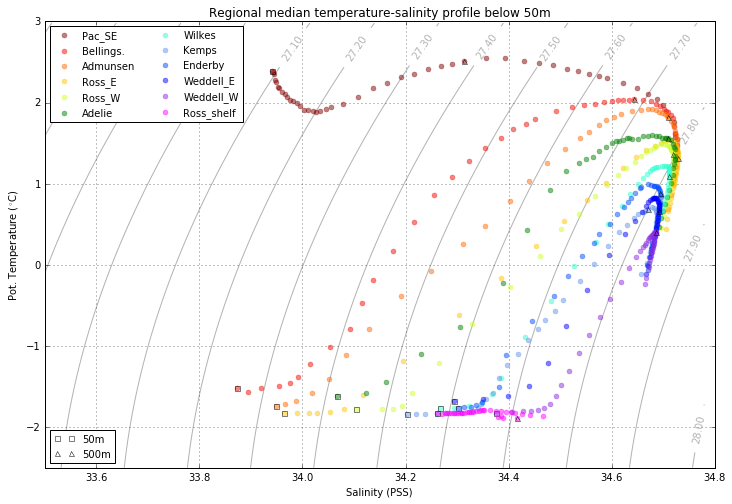

In [11]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import seawater as sw
from addDensityContours import addDensityContours


# define minimum pressure
min_pres = TS_data["Pressure"][0]

# get index for 500db
p500_idx = np.flatnonzero(TS_data["Pressure"]==500)[0]

# set axis limits
temp_lim = [-2.5, 3]
sal_lim = [33.5, 34.8]

# plot T-S data for each region


# load region colors
region_colors = pickle.load(open("region_colors.p", "rb"))

# plot T-S profile for each region
plt.figure(figsize=(12, 8))
p0_list = []  # list to collect plot handles
for reg in region_names:
    
    if reg == "Pressure":
        continue
    
    col = region_colors[reg]
    
    # plot all the data
    p0, = plt.plot(TS_data[reg]["Salinity"], TS_data[reg]["Pot-Temp"], 'o', color=col, markersize=5, 
                   zorder=10, mec=col, label=reg, alpha=0.5)
    
    # add square marker to shallowest (50m) data point
    p1, = plt.plot(TS_data[reg]["Salinity"][0], TS_data[reg]["Pot-Temp"][0], 's', mfc="None", markersize=5, 
                   zorder=10, mec='k', label='%sm'%min_pres)
        
    # add triangle marker at 500m
    if reg is not 'Ross_shelf':
        p2, = plt.plot(TS_data[reg]["Salinity"][p500_idx], TS_data[reg]["Pot-Temp"][p500_idx], '^', 
                       mfc="None", ms=5, zorder=10, mec='k', label='500m')
    
    marker_list = [p1, p2]
    p0_list.append(p0)
    
# add density contours, axis labels and other stuff
addDensityContours(plt.gca(), temp_range=temp_lim, sal_range=sal_lim, drho=0.1)
plt.ylim(temp_lim)
plt.xlim(sal_lim)
plt.ylabel('Pot. Temperature ($^{\circ}$C)')
plt.xlabel('Salinity (PSS)')
plt.grid(True)
plt.title("Regional median temperature-salinity profile below %sm" %min_pres)

# create legend for region labels
leg1 = plt.legend(handles=p0_list, loc=2, ncol=2, numpoints=1, fontsize=10)  

# create legend for region depth labels
plt.legend(handles=marker_list, loc=3, fontsize=10)
plt.gca().add_artist(leg1)

# save figure
plt.savefig('regional_median_TS_profiles.pdf', bbox_inches='tight')

In [3]:
print("Region names:\n")
for region_name in region_names:
    print(region_name)

Region names:

Kemps
Weddell_W
Wilkes
Bellings.
Enderby
Ross_shelf
Admunsen
Ross_W
Ross_E
Adelie
Pac_SE
Weddell_E
